In [1]:
! sudo apt-get update
! sudo apt-get install -y libxrender1
! sudo apt install -y libsm6 libxext6

Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [48.4 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,183 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [245 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [14.8 kB]
Fetched 8,650 kB in 3s (2,665 kB/s)




The following additional packages will be installed:
  libbsd0 libmd0 libx11-6 libx11-data libxau6 libxcb1 libxdmcp6
The following NEW packages will be installed:
  libbsd0 libmd0 libx11-6 libx11-data libxau6 libxcb1 libxdmcp6 libxrender1
0 upgraded, 8 newly installed, 0 to remove and 18 not upgraded.
Need to get 1,437 kB of archives.
After this operation, 4,065 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian bullseye/main amd64 libmd0 amd64 1.0.3-3 [28.0 kB]
Ge

In [2]:
import rdkit
from rdkit import Chem
import py3Dmol
import numpy as np

In [44]:
# mol = rdkit.Chem.MolFromMol2File('./simple.mol2')
mol = rdkit.Chem.MolFromMolFile('./Minoxidil.mol')
#mol = rdkit.Chem.AddHs(mol)

In [45]:
mblock = Chem.MolToMolBlock(mol)
view = py3Dmol.view(width=500, height=250)
view.addModel(mblock, 'mol')
view.setStyle({'stick':{}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

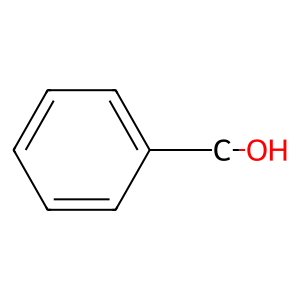

In [20]:
from rdkit.Chem import Draw
Draw.MolToImage(mol)

In [5]:
conformers = mol.GetConformers()
C1_coords = conformers[0].GetAtomPosition(0)
C2_coords = conformers[0].GetAtomPosition(1)
C3_coords = conformers[0].GetAtomPosition(2)
C4_coords = conformers[0].GetAtomPosition(3)
print(list(C1_coords))
print(list(C2_coords))
print(list(C3_coords))
print(list(C4_coords))

[1.0, -0.5, 0.0]
[0.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 1.5, 0.0]


In [6]:
import numpy as np
rot_mat = np.zeros((4,4))
print(rot_mat)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
#fix C1 and rotate C4
theta = np.pi
x_dash = C2_coords.x
y_dash = C2_coords.y
z_dash = C2_coords.z

x_ddash = C3_coords.x
y_ddash = C3_coords.y
z_ddash = C3_coords.z

dx = x_ddash - x_dash
dy = y_ddash - y_dash
dz = z_ddash - z_dash
l = np.sqrt(dx*dx + dy*dy + dz*dz)
s_theta = np.sin(theta)
c_theta = np.cos(theta)
l_sq = l*l


In [8]:
rot_mat[0][0] = (dx*dx + (dy*dy + dz*dz)*c_theta)/l_sq
rot_mat[0][1] = (dx*dy*(1-c_theta) - dz*l*s_theta)/l_sq
rot_mat[0][2] = (dx*dz*(1-c_theta) - dy*l*s_theta)/l_sq
rot_mat[0][3] = ((x_dash*(dy*dy + dz*dz) - dx*(y_dash*dy + z_dash*dz))*(1-c_theta) + (y_dash*dz - z_dash*dy)*l*s_theta)/l_sq

rot_mat[1][0] = (dx*dy*(1-c_theta) + dz*l*s_theta)/l_sq
rot_mat[1][1] = (dy*dy + (dx*dx + dz*dz)*c_theta)/l_sq
rot_mat[1][2] = (dy*dz*(1-c_theta) - dx*l*s_theta)/l_sq
rot_mat[1][3] = ((y_dash*(dx*dx + dz*dz) - dy*(x_dash*dx + z_dash*dz))*(1-c_theta) + (z_dash*dx - x_dash*dz)*l*s_theta)/l_sq

rot_mat[2][0] = (dx*dz*(1-c_theta) - dy*l*s_theta)/l_sq
rot_mat[2][1] = (dy*dz*(1-c_theta) + dx*l*s_theta)/l_sq
rot_mat[2][2] = (dz*dz + (dx*dx + dy*dy)*c_theta)/l_sq
rot_mat[2][3] = ((z_dash*(dx*dx + dy*dy) - dz*(x_dash*dx + y_dash*dy))*(1-c_theta) + (x_dash*dy - y_dash*dx)*l*s_theta)/l_sq

rot_mat[3][0] = 0.0
rot_mat[3][1] = 0.0
rot_mat[3][2] = 0.0
rot_mat[3][3] = 1.0

print(rot_mat)

[[-1.0000000e+00  0.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.2246468e-16  0.0000000e+00 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [9]:
C4_vector = list(C4_coords)
C4_vector.append(1.0)
C4_array = np.array(C4_vector).reshape((4,1))
C4_array

array([[1. ],
       [1.5],
       [0. ],
       [1. ]])

In [10]:
new_vector = np.matmul(rot_mat, C4_array)
print(new_vector)


In [11]:
hubo = {}

A_const= 20.0
### Hard constraint
hubo[('x11', 'x11')] = 1 * A_const
hubo[('x11', 'x12')] = 2.0 * A_const
hubo[('x11', 'x13')] = 2.0 * A_const
hubo[('x11', 'x14')] = 2.0 * A_const
hubo[('x11', )] = -2.0 * A_const
hubo[('x12', 'x12')] = 1 * A_const
hubo[('x12', 'x13')] = 2.0 * A_const
hubo[('x12', 'x14')] = 2.0 * A_const
hubo[('x12', )] = -2.0 * A_const
hubo[('x13', 'x13')] = 1 * A_const
hubo[('x13', 'x14')] = 2.0 * A_const
hubo[('x13', )] = -2.0 * A_const
hubo[('x14', 'x14')] = 1 * A_const
hubo[('x14', )] = -2.0 * A_const
hubo[()] = 1.0 * A_const

### optimizing constraint
#C1, C4 - X
hubo[('x11', 'x11')] -= 1
hubo[('x11', 'x13')] -= 2.0
hubo[('x11', )] -= -2.0
hubo[('x13', 'x13')] -= 1
hubo[('x13', )] -= 2.0
hubo[()] -= 1.0
#C1, C4 - Y
hubo[('x11', 'x11')] -= 2.25
hubo[('x11', 'x12')] -= 4.5
hubo[('x11', 'x13')] -= 4.5
hubo[('x11', 'x14')] -= 4.5
hubo[('x11', )] -= -1.5
hubo[('x12', 'x12')] -= 2.25
hubo[('x12', 'x13')] -= 4.5
hubo[('x12', 'x14')] -= 4.5
hubo[('x12', )] -= 1.5
hubo[('x13', 'x13')] -= 2.25
hubo[('x13', 'x14')] -= 4.5
hubo[('x13', )] -= 1.5
hubo[('x14', 'x14')] -= 2.25
hubo[('x14', )] -= 1.5
hubo[()] -= 0.25
#C1, C4 - Z
hubo[('x12', 'x12')] -= 1
hubo[('x12', 'x14')] -= -2.0
hubo[('x14', 'x14')] -= 1


#C2, C4 - X
hubo[('x11', 'x11')] -= 1
hubo[('x11', 'x13')] -= -2.0
hubo[('x13', 'x13')] -= 1
#C2, C4 - Y
hubo[('x11', 'x11')] -= 2.25
hubo[('x11', 'x12')] -= 4.5
hubo[('x11', 'x13')] -= 4.5
hubo[('x11', 'x14')] -= 4.5
hubo[('x12', 'x12')] -= 2.25
hubo[('x12', 'x13')] -= 4.5
hubo[('x12', 'x14')] -= 4.5
hubo[('x13', 'x13')] -= 2.25
hubo[('x13', 'x14')] -= 4.5
hubo[('x14', 'x14')] -= 2.25
#C2, C4 - Z
hubo[('x12', 'x12')] -= 1
hubo[('x12', 'x14')] -= -2.0
hubo[('x14', 'x14')] -= 1

print(hubo)

{('x11', 'x11'): 13.5, ('x11', 'x12'): 31.0, ('x11', 'x13'): 31.0, ('x11', 'x14'): 31.0, ('x11',): -36.5, ('x12', 'x12'): 13.5, ('x12', 'x13'): 31.0, ('x12', 'x14'): 35.0, ('x12',): -41.5, ('x13', 'x13'): 13.5, ('x13', 'x14'): 31.0, ('x13',): -43.5, ('x14', 'x14'): 13.5, ('x14',): -41.5, (): 18.75}


In [12]:
import dimod
bqm = dimod.make_quadratic(hubo, 12.0, dimod.BINARY) 

In [13]:
import neal
sampler = neal.SimulatedAnnealingSampler()
sample_size=10

In [14]:
sampleset = sampler.sample(bqm, num_reads=sample_size)
print(sampleset)

  x11 x12 x13 x14 energy num_oc.
0   0   0   1   0 -11.25       1
5   0   0   1   0 -11.25       1
7   0   0   1   0 -11.25       1
9   0   0   1   0 -11.25       1
2   0   1   0   0  -9.25       1
1   0   0   1   1  -8.25       1
3   0   1   1   0  -8.25       1
8   0   1   1   0  -8.25       1
4   1   0   0   0  -4.25       1
6   1   0   0   0  -4.25       1
['BINARY', 10 rows, 10 samples, 4 variables]


In [15]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=1000)

In [16]:
print(sampleset)

  x11 x12 x13 x14 energy num_oc. chain_.
0   0   0   1   0 -11.25     479     0.0
1   0   0   0   1  -9.25      97     0.0
2   0   1   0   0  -9.25     194     0.0
3   0   0   1   1  -8.25      80     0.0
4   0   1   1   0  -8.25     136     0.0
5   1   0   0   0  -4.25       6     0.0
6   1   0   1   0  -3.25       2     0.0
7   0   1   0   1  -2.25       2     0.0
8   1   1   0   0  -1.25       2     0.0
9   1   0   0   1  -1.25       2     0.0
['BINARY', 10 rows, 1000 samples, 4 variables]
